In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('retail-sample-1 (1).csv')
df.isnull().sum()

store                    0
sale.date                0
tran.no                  0
tran.type                0
cashier                  0
style                    0
style.desc               0
size                     0
color                    0
class.desc               0
sub.class.desc           0
unit                     0
unit.cost               64
sale.amt                 0
unit.current.retail      0
unit.original.retail     0
dtype: int64

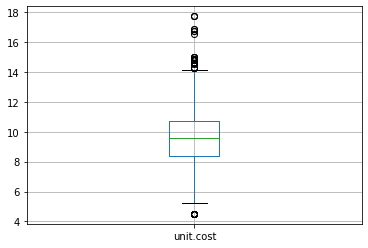

In [49]:
df.boxplot(column=['unit.cost'])
plt.show()

In [50]:
df1=pd.read_csv('retail-sample-2.csv')
df1.isnull().sum()

store                     0
sale.date                 0
tran.no                   0
tran.type                 0
cashier                   0
style                     0
style.desc                0
size                      0
color                     0
class.desc                0
sub.class.desc            0
unit                      0
unit.cost               572
sale.amt                  0
unit.current.retail       0
unit.original.retail      0
dtype: int64

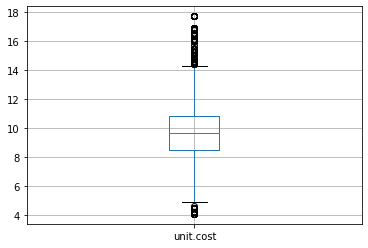

In [51]:
df1.boxplot(column=['unit.cost'])
plt.show()

In [52]:
merged_df = pd.concat([df, df1], axis=0)
Q1 = merged_df['unit.cost'].quantile(0.25)
Q3 = merged_df['unit.cost'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [53]:
outliers = merged_df.loc[(merged_df['unit.cost'] < lower_bound) | (merged_df['unit.cost'] > upper_bound)]

In [54]:
# Print the count of outliers
print('Number of outliers:', len(outliers))

Number of outliers: 569


In [55]:
merged_df.shape

(55445, 16)

In [56]:
merged_df.isna().sum()

store                     0
sale.date                 0
tran.no                   0
tran.type                 0
cashier                   0
style                     0
style.desc                0
size                      0
color                     0
class.desc                0
sub.class.desc            0
unit                      0
unit.cost               636
sale.amt                  0
unit.current.retail       0
unit.original.retail      0
dtype: int64

### Calculate Mean of each type of class and assign individual group mean/median
### Check which group has most missing value

In [57]:
median_unit_cost_subclasswise=merged_df.groupby(['sub.class.desc'])['unit.cost'].median()
median_unit_cost_subclasswise

sub.class.desc
Blouse                     10.1000
Bodysuits                   9.0600
Button Down                 9.8500
Kimono                      9.8500
Long Cardigans             11.8200
Long Sleeve Knits           8.6700
Misc Fashion Tops           5.7500
Pullover Sweater           11.2500
Short Cardigans            12.5600
Short Sleeve Knits          8.1300
Sleeveless Woven Tanks      8.8700
Sweater Tanks and Tanks     9.5889
Sweatshirt                 11.3300
Traditional Cardigan       10.8400
Vest                       11.8200
Name: unit.cost, dtype: float64

In [58]:
mean_unit_cost_subclasswise=merged_df.groupby(['sub.class.desc'])['unit.cost'].mean()
mean_unit_cost_subclasswise

sub.class.desc
Blouse                     10.004369
Bodysuits                   8.956256
Button Down                 9.897298
Kimono                     10.696489
Long Cardigans             11.704310
Long Sleeve Knits           8.877064
Misc Fashion Tops           5.750000
Pullover Sweater           11.098416
Short Cardigans            12.444571
Short Sleeve Knits          8.226013
Sleeveless Woven Tanks      8.656300
Sweater Tanks and Tanks     9.267193
Sweatshirt                 10.842304
Traditional Cardigan       10.738244
Vest                       11.921899
Name: unit.cost, dtype: float64

In [59]:
# group the DataFrame by the category column and count the number of missing values in the value column for each group
missing_counts = merged_df.groupby('sub.class.desc')['unit.cost'].apply(lambda x: x.isna().sum())
missing_counts

sub.class.desc
Blouse                     117
Bodysuits                    9
Button Down                 71
Kimono                       7
Long Cardigans              21
Long Sleeve Knits           23
Misc Fashion Tops            1
Pullover Sweater           101
Short Cardigans             19
Short Sleeve Knits         101
Sleeveless Woven Tanks     118
Sweater Tanks and Tanks     37
Sweatshirt                   5
Traditional Cardigan         2
Vest                         4
Name: unit.cost, dtype: int64

In [60]:
merged_df['unit.cost'] = merged_df.groupby('sub.class.desc')['unit.cost'].transform(lambda x: x.fillna(x.median()))

In [61]:
merged_df.isna().sum()

store                   0
sale.date               0
tran.no                 0
tran.type               0
cashier                 0
style                   0
style.desc              0
size                    0
color                   0
class.desc              0
sub.class.desc          0
unit                    0
unit.cost               0
sale.amt                0
unit.current.retail     0
unit.original.retail    0
dtype: int64

In [62]:
merged_df=merged_df.drop(['style','style.desc'], axis=1)

In [63]:
merged_df['sale.date']=pd.to_datetime(merged_df['sale.date'])

In [64]:
#Extracting date from date and time

merged_df['sale.date'] = merged_df['sale.date'].dt.date

In [65]:
merged_df['gross_margin']=(merged_df['sale.amt']-(merged_df['unit.cost']*merged_df['unit']))/merged_df['sale.amt']

In [66]:
merged_df['cost']=merged_df['unit.cost']*merged_df['unit']

In [67]:
###gross margin by store
profit_storewise = merged_df.groupby(['store'])['sale.amt'].sum() - merged_df.groupby(['store'])['cost'].sum()
profit_storewise

store
3      62901.4159
7     121917.2976
11     68029.8543
13     51317.6990
14    111769.1693
16     66856.5263
19    151730.0080
20    137959.0272
21    105753.9018
27     55966.2688
dtype: float64

In [68]:
sales_storewise=merged_df.groupby(['store'])['sale.amt'].sum()
sales_storewise

store
3     103316.88
7     192465.96
11    110189.71
13     80598.48
14    174763.02
16    103167.93
19    239191.94
20    217038.83
21    164570.02
27     89687.75
Name: sale.amt, dtype: float64

# graph for f=gross margin and sales by store

In [69]:
store_data = pd.DataFrame({'Store': profit_storewise.index, 'Gross Profit': profit_storewise, 'Sales': sales_storewise})
store_data = store_data.sort_values(by='Sales', ascending=False)

import plotly.graph_objects as go

# Define custom color palette
my_palette = ['#2E7D32', '#81C784']

# Create a horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=store_data['Store'].astype(str),
    x=store_data['Gross Profit'],
    name='Gross Profit',
    orientation='h',
    marker=dict(color=my_palette[0])
))

fig.add_trace(go.Bar(
    y=store_data['Store'].astype(str),
    x=store_data['Sales'],
    name='Sales',
    orientation='h',
    marker=dict(color=my_palette[1])
))

# Customize the chart
fig.update_layout(
    title="Sales and Gross Profit by Store",
    xaxis_title="Amount",
    yaxis_title="Store",
    yaxis=dict(autorange="reversed", categoryorder='total ascending'),
    legend_title="",
    barmode='group',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(size=14),
)

# Display the chart
fig.show()



In [70]:
# Print the store_data DataFrame
print(store_data)


       Store  Gross Profit      Sales
store                                
19        19   151730.0080  239191.94
20        20   137959.0272  217038.83
7          7   121917.2976  192465.96
14        14   111769.1693  174763.02
21        21   105753.9018  164570.02
11        11    68029.8543  110189.71
3          3    62901.4159  103316.88
16        16    66856.5263  103167.93
27        27    55966.2688   89687.75
13        13    51317.6990   80598.48


In [71]:
gross_margin_storewise = profit_storewise / sales_storewise
results_df = pd.DataFrame()

# add the gross margin column to the DataFrame
results_df['gross_margin'] = gross_margin_storewise

# add the store column to the DataFrame
results_df['store'] = profit_storewise.index

results_df.sort_values('gross_margin', ascending=False)

,gross_margin,store
store,,
16,0.648036,16
21,0.642607,21
14,0.639547,14
13,0.636708,13
20,0.635642,20
19,0.634344,19
7,0.633449,7
27,0.624012,27
11,0.617388,11


# #Grpah for gross margin seasonwise across stores

In [72]:
import pandas as pd

# Convert the 'open_dt' column to a datetime object
merged_df['sale.date'] = pd.to_datetime(merged_df['sale.date'])

# Create a dictionary mapping each season to its start and end dates
seasons = {
    'Winter': {'start': pd.to_datetime('2019-01-01'), 'end': pd.to_datetime('2019-03-20')},
    'Spring': {'start': pd.to_datetime('2019-03-21'), 'end': pd.to_datetime('2019-06-20')},
    'Summer': {'start': pd.to_datetime('2019-06-21'), 'end': pd.to_datetime('2019-09-23')},
    'Fall': {'start': pd.to_datetime('2019-09-24'), 'end': pd.to_datetime('2019-12-31')}
}

# Define a function to assign the season based on the start date
def assign_season(row):
    for season, dates in seasons.items():
        if row['sale.date'] >= dates['start'] and row['sale.date'] <= dates['end']:
            return season

# Create a new column 'season' using the assign_season function
merged_df['season'] = merged_df.apply(assign_season, axis=1)

In [73]:
merged_df['season'].value_counts()

Fall      17815
Summer    14470
Spring    13428
Winter     9732
Name: season, dtype: int64

In [74]:
###gross margin seasonwise

profit_season_wise = merged_df.groupby(['season'])['sale.amt'].sum() - merged_df.groupby(['season'])['cost'].sum()
profit_season_wise
sales_season_wise=merged_df.groupby(['season'])['sale.amt'].sum()
sales_season_wise
gross_margin_season_wise = profit_season_wise / sales_season_wise
results_df6 = pd.DataFrame()

# add the gross margin column to the DataFrame
results_df6['gross_margin'] = gross_margin_season_wise

print(results_df6)

        gross_margin
season              
Fall        0.611492
Spring      0.633996
Summer      0.665538
Winter      0.622928


In [75]:
# Group by store and season, then calculate profit and sales
store_profit_season_wise = merged_df.groupby(['store', 'season'])['sale.amt'].sum() - merged_df.groupby(['store', 'season'])['cost'].sum()
store_sales_season_wise = merged_df.groupby(['store', 'season'])['sale.amt'].sum()

# Calculate gross margin for each store in each season
store_gross_margin_season_wise = store_profit_season_wise / store_sales_season_wise

# Convert the gross margin series to a DataFrame and reset the index
results_df7 = pd.DataFrame(store_gross_margin_season_wise, columns=['gross_margin']).reset_index()

# Sort the DataFrame by season and gross margin (in descending order)
results_df7 = results_df7.sort_values(['season', 'gross_margin'], ascending=[True, False])

# Display the sorted DataFrame
print(results_df7)


    store  season  gross_margin
24     19    Fall      0.628435
12     13    Fall      0.626491
4       7    Fall      0.623845
20     16    Fall      0.621726
28     20    Fall      0.614534
36     27    Fall      0.606360
32     21    Fall      0.603704
16     14    Fall      0.600817
8      11    Fall      0.599093
0       3    Fall      0.574483
33     21  Spring      0.659699
21     16  Spring      0.647692
17     14  Spring      0.646222
29     20  Spring      0.642454
5       7  Spring      0.636590
9      11  Spring      0.629072
25     19  Spring      0.623745
1       3  Spring      0.612048
37     27  Spring      0.611764
13     13  Spring      0.603541
14     13  Summer      0.685765
22     16  Summer      0.676937
26     19  Summer      0.676282
34     21  Summer      0.674392
18     14  Summer      0.670982
38     27  Summer      0.666418
30     20  Summer      0.663811
10     11  Summer      0.653921
6       7  Summer      0.653822
2       3  Summer      0.629032
35     2

In [76]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming the sorted DataFrame is named results_df7
season_wise_gross_sorted = results_df7

# Find the highest and lowest gross margin stores for each season
highest_gross_margin = season_wise_gross_sorted.groupby('season').head(1)
lowest_gross_margin = season_wise_gross_sorted.groupby('season').tail(1)

# Merge the highest and lowest gross margin stores
combined_df = pd.concat([highest_gross_margin, lowest_gross_margin])

# Create a grouped bar chart with subplots for each season
fig = make_subplots(rows=1, cols=4, subplot_titles=("Fall", "Spring", "Summer", "Winter"))

# Define the color scale
color_scale = {'Highest': '#1f77b4', 'Lowest': '#aec7e8'}

# Add traces for each season and store
for index, (season, season_df) in enumerate(combined_df.groupby("season")):
    for idx, row in season_df.iterrows():
        if row['store'] == highest_gross_margin.loc[highest_gross_margin['season'] == row['season'], 'store'].values[0]:
            label = "Highest"
        else:
            label = "Lowest"

        fig.add_trace(go.Bar(x=[f"Store {row['store']}"],
                             y=[row['gross_margin']*100],
                             name=label,
                             marker=dict(color=color_scale[label]),
                             legendgroup=label,
                             showlegend=index == 0),
                      row=1, col=index + 1)

# Update the layout
fig.update_layout(title="Seasonwise Highest and Lowest Gross Margin Stores",
                  barmode='group',
                  plot_bgcolor='rgba(0,0,0,0)',
                  )

# Show the figure
fig.show()


In [77]:
# Merge the highest and lowest gross margin stores into a single DataFrame
combined_df = pd.concat([highest_gross_margin, lowest_gross_margin])

# Set new index names for better readability
combined_df = combined_df.set_index(['season', 'store']).sort_index()

# Rename the columns for better readability
combined_df.index.names = ['Season', 'Store']
combined_df.columns = ['Gross Margin']

# Print the resulting DataFrame
print(combined_df)


              Gross Margin
Season Store              
Fall   3          0.574483
       19         0.628435
Spring 13         0.603541
       21         0.659699
Summer 3          0.629032
       13         0.685765
Winter 11         0.570259
       21         0.649168


In [78]:
###gross margin by product class
profit_productclass_wise = merged_df.groupby(['class.desc'])['sale.amt'].sum() - merged_df.groupby(['class.desc'])['cost'].sum()
profit_productclass_wise
sales_per_class=merged_df.groupby(['class.desc'])['sale.amt'].sum()
sales_per_class
gross_margin_pclass_wise = profit_productclass_wise / sales_per_class
results_df1 = pd.DataFrame()

# add the gross margin column to the DataFrame
results_df1['gross_margin'] = gross_margin_pclass_wise

# add the store column to the DataFrame
results_df1['class.desc'] = profit_productclass_wise.index

print(results_df1)

                          gross_margin                class.desc
class.desc                                                      
Cardigans,Wraps,Sweaters      0.625601  Cardigans,Wraps,Sweaters
Fashion Tops                  0.636779              Fashion Tops


In [82]:
# Calculate the profit for each store under each product class
profit_store_productclass = merged_df.groupby(['store', 'class.desc'])['sale.amt'].sum() - merged_df.groupby(['store', 'class.desc'])['cost'].sum()

# Calculate the sales for each store under each product class
sales_store_productclass = merged_df.groupby(['store', 'class.desc'])['sale.amt'].sum()

# Calculate the gross margin for each store under each product class
gross_margin_store_productclass = profit_store_productclass / sales_store_productclass

# Create a DataFrame with the store, product class, and gross margin
store_productclass_data = pd.DataFrame({'Gross Margin': gross_margin_store_productclass})

# Reset the index to convert the multi-level index to columns
store_productclass_data = store_productclass_data.reset_index()

# Sort the data in descending order by product class and gross margin
store_productclass_data_sorted = store_productclass_data.sort_values(by=['class.desc', 'Gross Margin'], ascending=[True, False])

# Find the highest and lowest 2 gross margin stores for each product class
highest_gross_margin = store_productclass_data_sorted.groupby('class.desc').head(2)
lowest_gross_margin = store_productclass_data_sorted.groupby('class.desc').tail(2)

# Merge the highest and lowest 2 gross margin stores
combined_df = pd.concat([highest_gross_margin, lowest_gross_margin])

# Print the combined DataFrame
print(combined_df)


    store                class.desc  Gross Margin
10     16  Cardigans,Wraps,Sweaters      0.645759
16     21  Cardigans,Wraps,Sweaters      0.635935
11     16              Fashion Tops      0.648809
17     21              Fashion Tops      0.646045
18     27  Cardigans,Wraps,Sweaters      0.606443
0       3  Cardigans,Wraps,Sweaters      0.596400
5      11              Fashion Tops      0.615052
1       3              Fashion Tops      0.613242


In [84]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming the combined_df DataFrame is already created
combined_df = combined_df.sort_values(by=['class.desc', 'Gross Margin'], ascending=[True, False])

# Get unique product classes
product_classes = combined_df['class.desc'].unique()

# Create a grouped bar chart with subplots for each product class
fig = make_subplots(rows=1, cols=len(product_classes), subplot_titles=product_classes, shared_yaxes=True)

# Define the color scale
color_scale = {'Highest': '#9467bd', 'Lowest': '#c5b0d5'}

# Add traces for each product class and store
for index, (product_class, class_df) in enumerate(combined_df.groupby("class.desc")):
    for idx, row in class_df.iterrows():
        if row['store'] in highest_gross_margin.loc[highest_gross_margin['class.desc'] == row['class.desc'], 'store'].values:
            label = "Highest"
        else:
            label = "Lowest"

        fig.add_trace(go.Bar(x=[f"Store {row['store']}"],
                             y=[row['Gross Margin'] * 100],
                             name=label,
                             marker=dict(color=color_scale[label]),
                             legendgroup=label,
                             showlegend=(index == 0 and (idx == 0 or idx == len(class_df) - 1))),
                      row=1, col=index + 1)

# Update the layout
fig.update_layout(title="Product Class-wise Highest and Lowest Gross Margin Stores",
                  barmode='group',
                  plot_bgcolor='rgba(0,0,0,0)',
                  )

# Show the figure
fig.show()


In [85]:
###gross margin by product colorwise
profit_productcolor_wise = merged_df.groupby(['color'])['sale.amt'].sum() - merged_df.groupby(['color'])['cost'].sum()
profit_productcolor_wise
sales_per_color=merged_df.groupby(['color'])['sale.amt'].sum()
sales_per_color
gross_margin_color_wise = profit_productcolor_wise / sales_per_color
results_df2 = pd.DataFrame()

# add the gross margin column to the DataFrame
results_df2['gross_margin'] = gross_margin_color_wise

# add the store column to the DataFrame
results_df2['color'] = profit_productcolor_wise.index

results_df2.sort_values('gross_margin', ascending=False)

,gross_margin,color
color,,
Dark Rose,0.809060,Dark Rose
Topaz,0.800972,Topaz
No Color,0.747500,No Color
Yellow,0.745763,Yellow
Banana,0.744733,Banana
...,...,...
Dark Teal,0.254326,Dark Teal
Light Rose,0.243299,Light Rose
Mint,0.231860,Mint


In [86]:
###gross margin by product subclass

profit_subclass_wise = merged_df.groupby(['sub.class.desc'])['sale.amt'].sum() - merged_df.groupby(['sub.class.desc'])['cost'].sum()
profit_subclass_wise
sales_subclasswise=merged_df.groupby(['sub.class.desc'])['sale.amt'].sum()
sales_subclasswise
gross_margin_subclass_wise = profit_subclass_wise / sales_subclasswise
count1=merged_df.groupby(['sub.class.desc'])['sale.amt'].count()
total_units_sold = merged_df['sale.amt'].count()
perc_transaction=round(count1/total_units_sold *100,2)
results_df3 = pd.DataFrame()

# add the gross margin column to the DataFrame
results_df3['gross_margin'] = gross_margin_subclass_wise

#add the count of units sold
results_df3['No. of units sold'] = count1

#add the percent of units sold
results_df3['Perc. of units sold'] = perc_transaction

# add the store column to the DataFrame
results_df3['sub_class'] = profit_subclass_wise.index

results_df3.sort_values('gross_margin', ascending=False)

,gross_margin,No. of units sold,Perc. of units sold,sub_class
sub.class.desc,,,,
Sweater Tanks and Tanks,0.676506,1707,3.08,Sweater Tanks and Tanks
Kimono,0.667929,457,0.82,Kimono
Sleeveless Woven Tanks,0.659874,7882,14.22,Sleeveless Woven Tanks
Button Down,0.653293,6925,12.49,Button Down
Short Sleeve Knits,0.646518,10220,18.43,Short Sleeve Knits
Pullover Sweater,0.627983,8944,16.13,Pullover Sweater
Traditional Cardigan,0.623431,281,0.51,Traditional Cardigan
Long Sleeve Knits,0.621562,2948,5.32,Long Sleeve Knits
Bodysuits,0.618602,439,0.79,Bodysuits


In [87]:
import plotly.graph_objects as go
import plotly.express as px

top3 = results_df3.nlargest(3, 'No. of units sold')
lowest3 = results_df3.nsmallest(3, 'No. of units sold')

combined = pd.concat([top3, lowest3])

combined['gross_margin'] = combined['gross_margin'] * 100

fig = px.scatter(combined, 
                 x='gross_margin', 
                 y='No. of units sold', 
                 text='sub_class', 
                 title='Gross Margin vs. Number of Units Sold for Top 3 and Lowest 3 Subclasses',
                 labels={'gross_margin': 'Gross Margin (%)',
                         'No. of units sold': 'Number of Units Sold'},
                 hover_name='sub_class',
                 hover_data=['gross_margin', 'No. of units sold'],
                 width=800,
                 height=600)

fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=15, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(xaxis=dict(tickformat='.2f', ticksuffix='%'), plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

# Add gridlines to the plot
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

fig.show()


In [88]:
print(combined)


                      gross_margin  No. of units sold  Perc. of units sold  \
sub.class.desc                                                               
Blouse                   61.002373              11191                20.18   
Short Sleeve Knits       64.651821              10220                18.43   
Pullover Sweater         62.798295               8944                16.13   
Misc Fashion Tops        38.601175                  2                 0.00   
Vest                     47.056021                 83                 0.15   
Traditional Cardigan     62.343109                281                 0.51   

                                 sub_class  
sub.class.desc                              
Blouse                              Blouse  
Short Sleeve Knits      Short Sleeve Knits  
Pullover Sweater          Pullover Sweater  
Misc Fashion Tops        Misc Fashion Tops  
Vest                                  Vest  
Traditional Cardigan  Traditional Cardigan  


In [89]:
profit_store_subclass_wise = merged_df.groupby(['store','sub.class.desc'])['sale.amt'].sum() - merged_df.groupby(['store','sub.class.desc'])['cost'].sum()
profit_store_subclass_wise


store  sub.class.desc         
3      Blouse                     14594.3538
       Bodysuits                    497.6900
       Button Down                 9675.7367
       Kimono                      1031.0500
       Long Cardigans               971.2256
                                     ...    
27     Sleeveless Woven Tanks      7036.5749
       Sweater Tanks and Tanks     1692.6201
       Sweatshirt                   860.2667
       Traditional Cardigan         239.2700
       Vest                          62.3300
Length: 142, dtype: float64

In [90]:
sales_store_subclasswise=merged_df.groupby(['store','sub.class.desc'])['sale.amt'].sum()
sales_store_subclasswise
gross_margin_store_subclass_wise = profit_store_subclass_wise / sales_store_subclasswise
count2=merged_df.groupby(['store','sub.class.desc'])['sale.amt'].count()


In [91]:
results_df4 = pd.DataFrame()

# add the store column to the DataFrame
results_df4['profit'] = profit_store_subclass_wise

# add the count column to the DataFrame
results_df4['No. of units sold'] = count2

# add the gross margin column to the DataFrame
results_df4['gross_margin'] = gross_margin_store_subclass_wise




print(results_df4)

                                   profit  No. of units sold  gross_margin
store sub.class.desc                                                      
3     Blouse                   14594.3538                959      0.602983
      Bodysuits                  497.6900                 38      0.588947
      Button Down               9675.7367                553      0.636788
      Kimono                    1031.0500                 52      0.652543
      Long Cardigans             971.2256                 76      0.519025
...                                   ...                ...           ...
27    Sleeveless Woven Tanks    7036.5749                414      0.664290
      Sweater Tanks and Tanks   1692.6201                 88      0.659685
      Sweatshirt                 860.2667                 58      0.577414
      Traditional Cardigan       239.2700                 15      0.594194
      Vest                        62.3300                  3      0.637386

[142 rows x 3 columns]


In [92]:
top3_df = results_df4.groupby(['store']).apply(lambda x: x.nlargest(3, 'gross_margin')).reset_index(level=1, drop=True).reset_index()
top3_df

,store,sub.class.desc,profit,No. of units sold,gross_margin
0,3,Sweater Tanks and Tanks,2172.9292,116,0.674749
1,3,Kimono,1031.0500,52,0.652543
2,3,Button Down,9675.7367,553,0.636788
3,7,Button Down,14939.0542,787,0.659685
4,7,Sleeveless Woven Tanks,17216.4066,1031,0.659673
5,7,Sweater Tanks and Tanks,3192.1888,178,0.657365
6,11,Kimono,625.2600,26,0.681371
7,11,Sleeveless Woven Tanks,8566.5931,498,0.663338
8,11,Sweater Tanks and Tanks,1632.6528,92,0.655589
9,13,Kimono,406.6700,17,0.691098


In [93]:
bottom3_df = results_df4.groupby(['store']).apply(lambda x: x.nsmallest(3, 'gross_margin')).reset_index(level=1, drop=True).reset_index()
bottom3_df

,store,sub.class.desc,profit,No. of units sold,gross_margin
0,3,Vest,41.1100,14,0.197692
1,3,Traditional Cardigan,178.0500,17,0.491444
2,3,Long Cardigans,971.2256,76,0.519025
3,7,Vest,85.3100,11,0.392014
4,7,Short Cardigans,3981.0773,249,0.561360
5,7,Sweatshirt,1031.8250,74,0.568176
6,11,Vest,91.9600,10,0.436160
7,11,Sweatshirt,844.7148,60,0.556752
8,11,Blouse,13808.2174,961,0.585576
9,13,Vest,3.4000,1,0.213836


In [94]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming your dataframes are already created: top3_df and bottom3_df

# Find the store with the highest gross margin
highest_margin_store = top3_df.loc[top3_df['gross_margin'].idxmax()]['store']

# Filter the top3_df for the highest margin store
highest_store_df = top3_df[top3_df['store'] == highest_margin_store]

# Find the store with the lowest gross margin
lowest_margin_store = bottom3_df.loc[bottom3_df['gross_margin'].idxmin()]['store']

# Filter the bottom3_df for the lowest margin store
lowest_store_df = bottom3_df[bottom3_df['store'] == lowest_margin_store]

# Merge the highest and lowest margin store data
combined_df = pd.concat([highest_store_df, lowest_store_df])

# Create a grouped bar chart with 1 row and 3 columns (2 for bar chart and 1 for table)
fig = make_subplots(rows=1, cols=3, column_widths=[0.4, 0.4, 0.2], specs=[[{'type': 'xy'}, {'type': 'xy'}, {'type': 'domain'}]], subplot_titles=(f"Store {highest_margin_store} (Highest)",
                                                    f"Store {lowest_margin_store} (Lowest)", "Units Sold"))

# Define the color scale
color_scale = ['#FEE0D2', '#FBB4B9', '#F768A1']

# Add traces for each store and subclass
for index, (store, store_df) in enumerate(combined_df.groupby("store")):
    for idx, row in store_df.iterrows():
        fig.add_trace(go.Bar(x=[f"Store {row['store']}"],
                             y=[row['gross_margin']],
                             name=row['sub.class.desc'],
                             marker=dict(color=color_scale[idx % 3]),
                             legendgroup=row['sub.class.desc'],
                             showlegend=index == 0),
                      row=1, col=index + 1)

# Update the layout
fig.update_layout(title="Highest and Lowest Gross Margin Stores",
                  yaxis_title="Gross Margin",
                  barmode='group')

# Add a table with No. of units sold
# Add a table with No. of units sold
fig.add_trace(go.Table(header=dict(values=['Store', 'Subclass', 'Units Sold'],
                                    fill_color='rgba(245, 245, 245, 1)',
                                    align='center'),
                        cells=dict(values=[combined_df['store'],
                                           combined_df['sub.class.desc'],
                                           combined_df['No. of units sold']],
                                   fill_color='rgba(255, 255, 179, 0.5)',
                                   align='center',
                                   font=dict(size=10)),  # Set the font size to 10
                        ),
              row=1, col=3)


# Show the figure
fig.show()


In [95]:
print(combined_df)


    store           sub.class.desc      profit  No. of units sold  \
12     14                   Kimono   1207.7400                 50   
13     14  Sweater Tanks and Tanks   3465.2021                167   
14     14                     Vest    130.2800                  5   
24     21        Misc Fashion Tops     -2.0000                  1   
25     21               Sweatshirt   1123.1041                 84   
26     21                   Blouse  15391.6089                969   

    gross_margin  
12      0.691172  
13      0.690797  
14      0.687929  
24     -0.533333  
25      0.551528  
26      0.614505  


In [96]:
#Top 5 items saleswise in each store
sales_store_subclasswise=merged_df.groupby(['store','sub.class.desc'])['sale.amt'].sum()
count3=merged_df.groupby(['store','sub.class.desc'])['sale.amt'].count()
store_count=merged_df.groupby(['store'])['sale.amt'].count()
perc=round((count3/store_count)*100,2)           
results_df5 = pd.DataFrame()

# add the sales column to the DataFrame
results_df5['sales'] = sales_store_subclasswise
results_df5['Units sold'] = count3
results_df5['Percent_of_store_units_sold'] = perc
results_df5

sales  Units sold  \
store sub.class.desc                                  
3     Blouse                   24203.61         959   
      Bodysuits                  845.05          38   
      Button Down              15194.59         553   
      Kimono                    1580.05          52   
      Long Cardigans            1871.25          76   
...                                 ...         ...   
27    Sleeveless Woven Tanks   10592.62         414   
      Sweater Tanks and Tanks   2565.80          88   
      Sweatshirt                1489.86          58   
      Traditional Cardigan       402.68          15   
      Vest                        97.79           3   

                               Percent_of_store_units_sold  
store sub.class.desc                                        
3     Blouse                                         23.11  
      Bodysuits                                       0.92  
      Button Down                                    13.33  
      Kimono                                          1.25  
      Long Cardigans                                  1.83  
...                                                    ...  
27    Sleeveless Woven Tanks                         12.09  
      Sweater Tanks and Tanks                         2.57  
      Sweatshirt                                      1.69  
      Traditional Cardigan                            0.44  
      Vest                                            0.09  

[142 rows x 3 columns]

In [97]:
store_count

store
3     4149
7     7246
11    4217
13    2910
14    6519
16    3787
19    9036
20    8133
21    6025
27    3423
Name: sale.amt, dtype: int64

In [98]:
top5_df = results_df5.groupby(['store']).apply(lambda x: x.nlargest(5, 'sales')).reset_index(level=1, drop=True).reset_index()
top5_df

,store,sub.class.desc,sales,Units sold,Percent_of_store_units_sold
0,3,Blouse,24203.61,959,23.11
1,3,Pullover Sweater,16104.40,580,13.98
2,3,Sleeveless Woven Tanks,15916.28,694,16.73
3,3,Button Down,15194.59,553,13.33
4,3,Short Sleeve Knits,14664.77,676,16.29
5,7,Blouse,41477.43,1590,21.94
6,7,Pullover Sweater,40637.30,1338,18.47
7,7,Short Sleeve Knits,30475.53,1328,18.33
8,7,Sleeveless Woven Tanks,26098.39,1031,14.23
9,7,Button Down,22645.74,787,10.86


# Graph for size store wise 

In [99]:
# Calculate the profit store and size-wise
profit_store_size_wise = merged_df.groupby(['store', 'size'])['sale.amt'].sum() - merged_df.groupby(['store', 'size'])['cost'].sum()

# Calculate the sales store and size-wise
sales_per_store_size = merged_df.groupby(['store', 'size'])['sale.amt'].sum()

# Calculate the gross margin store and size-wise
gross_margin_store_size_wise = profit_store_size_wise / sales_per_store_size

# Create a DataFrame for the results
results_df2 = pd.DataFrame()

# Add the gross margin column to the DataFrame
results_df2['gross_margin'] = gross_margin_store_size_wise

# Reset the index to move the store and size columns from the index to columns
results_df2.reset_index(inplace=True)

print(results_df2)


    store         size  gross_margin
0       3  Extra Small      0.606992
1       3           LG      0.603958
2       3          MED      0.605389
3       3           SM      0.621656
4       3           XL      0.595741
..    ...          ...           ...
71     27      No Size      0.747500
72     27          S/M      0.453844
73     27           SM      0.623282
74     27           XL      0.622718
75     27          XXS      0.636157

[76 rows x 3 columns]


In [100]:
# Find the index of the maximum gross margin for each store
max_gross_margin_idx = results_df2.groupby('store')['gross_margin'].idxmax()

# Extract the rows with the maximum gross margin for each store
highest_gross_margin_sizes = results_df2.loc[max_gross_margin_idx]

# Sort the DataFrame by gross_margin in descending order
sorted_highest_gross_margin_sizes = highest_gross_margin_sizes.sort_values(by='gross_margin', ascending=False)

print(sorted_highest_gross_margin_sizes)



    store     size  gross_margin
71     27  No Size      0.747500
63     21      S/M      0.736665
55     20      S/M      0.719970
33     14      S/M      0.707462
23     13      M/L      0.695102
44     16      XXS      0.656769
10      7      S/M      0.653967
48     19       SM      0.638360
19     11       XL      0.627810
3       3       SM      0.621656


In [101]:
# Find the index of the minimum gross margin for each store
min_gross_margin_idx = results_df2.groupby('store')['gross_margin'].idxmin()

# Extract the rows with the minimum gross margin for each store
lowest_gross_margin_sizes = results_df2.loc[min_gross_margin_idx]

# Sort the DataFrame by gross_margin in ascending order
sorted_lowest_gross_margin_sizes = lowest_gross_margin_sizes.sort_values(by='gross_margin', ascending=True)

print(sorted_lowest_gross_margin_sizes)


    store size  gross_margin
72     27  S/M      0.453844
16     11  M/L      0.523583
53     20  M/L      0.546148
8       7  M/L      0.546437
5       3  XXS      0.570917
41     16  S/M      0.578810
35     14   XL      0.597423
50     19  XXS      0.613133
61     21  M/L      0.622249
25     13  S/M      0.626798


In [102]:
# Extract the top 3 stores with the highest gross margin
top_3_stores_highest_margin = sorted_highest_gross_margin_sizes.head(3)

# Extract the bottom 3 stores with the lowest gross margin
bottom_3_stores_lowest_margin = sorted_lowest_gross_margin_sizes.head(3)

print("Top 3 stores with the highest gross margin:")
print(top_3_stores_highest_margin)

print("\nBottom 3 stores with the lowest gross margin:")
print(bottom_3_stores_lowest_margin)


Top 3 stores with the highest gross margin:
    store     size  gross_margin
71     27  No Size      0.747500
63     21      S/M      0.736665
55     20      S/M      0.719970

Bottom 3 stores with the lowest gross margin:
    store size  gross_margin
72     27  S/M      0.453844
16     11  M/L      0.523583
53     20  M/L      0.546148


In [103]:
import pandas as pd
import plotly.graph_objs as go

# Create the DataFrame
data = {'store': [27, 21, 20, 27, 11, 20],
        'size': ['No Size', 'S/M', 'S/M', 'S/M', 'M/L', 'M/L'],
        'gross_margin': [0.747500, 0.736665, 0.719970, 0.453844, 0.523583, 0.546148],
        'category': ['Highest'] * 3 + ['Lowest'] * 3}

df = pd.DataFrame(data)

# Create a grouped bar chart
fig = go.Figure()

# Define the color scale
color_scale = {'Highest': '#1f77b4', 'Lowest': '#aec7e8'}

for category in ['Highest', 'Lowest']:
    category_df = df[df['category'] == category]
    fig.add_trace(go.Bar(
        x=category_df['store'].astype(str) + " (" + category_df['size'] + ")",
        y=category_df['gross_margin'] * 100,
        name=category,
        marker=dict(color=color_scale[category]),
        legendgroup=category
    ))

fig.update_layout(
    title="Top 3 and Bottom 3 Gross Margin Stores",
    xaxis_title="Store (Size)",
    yaxis_title="Gross Margin (%)",
    barmode='group',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

fig.show()


In [104]:
# Print the results in a tabular format
print(df.sort_values(by=['category', 'gross_margin'], ascending=[True, False]).reset_index(drop=True))


   store     size  gross_margin category
0     27  No Size      0.747500  Highest
1     21      S/M      0.736665  Highest
2     20      S/M      0.719970  Highest
3     20      M/L      0.546148   Lowest
4     11      M/L      0.523583   Lowest
5     27      S/M      0.453844   Lowest


In [105]:
#Flagging the items that are going on clearance sale
merged_df['product clearance'] = merged_df['unit.current.retail'].apply(lambda x: 1 if str(x)[-2:] == '97' or str(x)[-2:] == '98' else 0)

In [106]:
merged_df['product clearance']

0        0
1        0
2        1
3        1
4        1
        ..
50922    1
50923    1
50924    0
50925    0
50926    0
Name: product clearance, Length: 55445, dtype: int64

In [107]:
merged_df['product clearance'].value_counts()

0    44106
1    11339
Name: product clearance, dtype: int64

In [127]:
storewise_clearance=merged_df.groupby(['store'])['product clearance'].sum()
storewise_clearance

store
3     1269
7     1354
11     937
13     575
14    1319
16     684
19    2230
20    1505
21     675
27     791
Name: product clearance, dtype: int64

# Graph for storewise clearance 

In [128]:
import pandas as pd

# Assuming that you have a DataFrame named merged_df that contains the data

# Calculate the total clearance for each store
storewise_clearance = merged_df.groupby('store')['product clearance'].sum()

# Convert the result to a DataFrame and reset the index
clearance_df = pd.DataFrame({'store': storewise_clearance.index, 'clearance': storewise_clearance.values})

# Sort the DataFrame by clearance in descending order
clearance_df = clearance_df.sort_values('clearance', ascending=False)


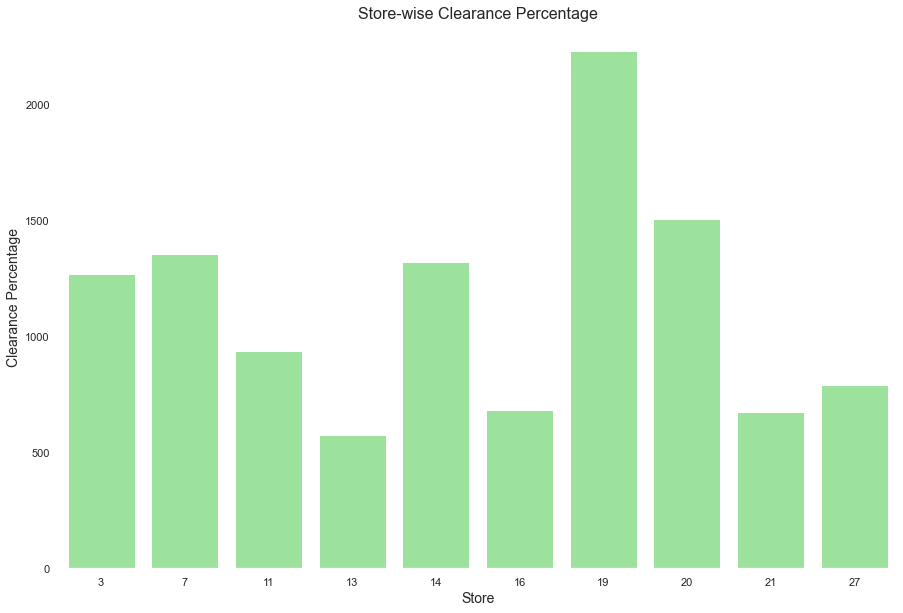

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named clearance_df
storewise_clearance = clearance_df.groupby('store')['clearance'].sum()
storewise_clearance_sorted = storewise_clearance.sort_values(ascending=False)

# Create the bar chart using the sorted DataFrame and light green color
plt.figure(figsize=(15, 10))
sns.set_theme(style='darkgrid')
ax = sns.barplot(x=storewise_clearance_sorted.index, y=storewise_clearance_sorted.values, color='lightgreen')

# Set the background color to white
ax.set_facecolor("white")

# Set the title and labels
plt.title("Store-wise Clearance Percentage", fontsize=16)
plt.xlabel("Store", fontsize=14)
plt.ylabel("Clearance Percentage", fontsize=14)

# Show the bar chart
plt.show()


In [131]:
merged_df.columns

Index(['store', 'sale.date', 'tran.no', 'tran.type', 'cashier', 'size',
       'color', 'class.desc', 'sub.class.desc', 'unit', 'unit.cost',
       'sale.amt', 'unit.current.retail', 'unit.original.retail',
       'gross_margin', 'cost', 'season', 'product clearance'],
      dtype='object')

In [132]:
merged_df.head()

,store,sale.date,tran.no,tran.type,cashier,size,color,class.desc,sub.class.desc,unit,unit.cost,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost,season,product clearance
0,19,2019-01-01,15553,S,2,MED,Ivory,Fashion Tops,Button Down,1,9.70,31.49,40.00,40.0,0.691966,9.70,Winter,0
1,19,2019-01-01,15555,S,2,SM,FOREST GREEN,Fashion Tops,Blouse,1,8.37,48.00,48.00,48.0,0.825625,8.37,Winter,0
2,19,2019-01-01,15557,S,2,MED,Black,Fashion Tops,Blouse,1,9.60,12.75,21.98,40.0,0.247059,9.60,Winter,1
3,19,2019-01-01,15557,S,2,MED,Ivory,Fashion Tops,Blouse,1,11.23,16.23,27.98,44.0,0.308071,11.23,Winter,1
4,19,2019-01-01,15561,S,2,Extra Small,Ivory,Fashion Tops,Blouse,1,11.23,14.95,27.98,44.0,0.248829,11.23,Winter,1


In [133]:
season_wise_clearance=merged_df.groupby(['season'])['product clearance'].sum()
season_wise_clearance

season
Fall      2390
Spring    3962
Summer    2259
Winter    2728
Name: product clearance, dtype: int64

In [134]:
season_wise_storewise_clearance=merged_df.groupby(['season','store'])['product clearance'].sum()
season_wise_storewise_clearance
total_clearance_each_season=merged_df.groupby(['season'])['product clearance'].sum()
perc_clearance_seasonwise=season_wise_storewise_clearance/total_clearance_each_season*100
perc_clearance_seasonwise

season  store
Fall    3        14.518828
        7        11.129707
        11        8.995816
        13        3.430962
        14       15.523013
        16        4.686192
        19       15.564854
        20       13.556485
        21        6.150628
        27        6.443515
Spring  3        10.121151
        7        10.146391
        11        7.218576
        13        8.101969
        14       10.752145
        16        7.521454
        19       21.049975
        20       12.342251
        21        4.921757
        27        7.824331
Summer  3        14.519699
        7        15.714918
        11        9.384683
        13        2.257636
        14       12.616202
        16        4.205401
        19       14.431164
        20       15.095175
        21        5.976096
        27        5.799026
Winter  3         7.074780
        7        12.133431
        11        8.211144
        13        4.435484
        14        8.687683
        16        6.561584
        19    

In [135]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming the percentage clearance DataFrame is already created and named perc_clearance_seasonwise

# Reset the index to convert the multi-level index to columns
perc_clearance_df = perc_clearance_seasonwise.reset_index()

# Sort the data in descending order for each season
perc_clearance_df_sorted = perc_clearance_df.sort_values(by=['season', 'product clearance'], ascending=[True, False])

# Find the highest and lowest clearance stores for each season
highest_clearance = perc_clearance_df_sorted.groupby('season').head(1)
lowest_clearance = perc_clearance_df_sorted.groupby('season').tail(1)

# Merge the highest and lowest clearance stores
combined_df = pd.concat([highest_clearance, lowest_clearance])

# Create a grouped bar chart with subplots for each season
fig = make_subplots(rows=1, cols=4, subplot_titles=("Fall", "Spring", "Summer", "Winter"))

# Define the color scale
color_scale = {'Highest': '#fdae6b', 'Lowest': '#e6550d'}

# Add traces for each season and store
for index, (season, season_df) in enumerate(combined_df.groupby("season")):
    for idx, row in season_df.iterrows():
        if row['store'] == highest_clearance.loc[highest_clearance['season'] == row['season'], 'store'].values[0]:
            label = "Highest"
        else:
            label = "Lowest"

        fig.add_trace(go.Bar(x=[f"Store {row['store']}"],
                             y=[row['product clearance']],
                             name=label,
                             marker=dict(color=color_scale[label]),
                             legendgroup=label,
                             showlegend=index == 0),
                      row=1, col=index + 1)

# Update the layout
fig.update_layout(title="Seasonwise Highest and Lowest Product Clearance Stores",
                  barmode='group',
                  plot_bgcolor='rgba(0,0,0,0)',
                  )

# Show the figure
fig.show()


In [136]:
# Print the highest and lowest clearance stores for each season
print("Highest and Lowest Clearance Stores by Season:")
print(combined_df)


Highest and Lowest Clearance Stores by Season:
    season  store  product clearance
6     Fall     19          15.564854
16  Spring     19          21.049975
21  Summer      7          15.714918
36  Winter     19          25.586510
3     Fall     13           3.430962
18  Spring     21           4.921757
23  Summer     13           2.257636
33  Winter     13           4.435484


# Graph of clerance by size 

In [139]:
# Calculate the clearance store and size-wise
clearance_store_size_wise = merged_df.groupby(['store', 'size'])['product clearance'].sum()

# Create a DataFrame for the results
results_df2 = pd.DataFrame()

# Add the clearance column to the DataFrame
results_df2['clearance'] = clearance_store_size_wise

# Reset the index to move the store and size columns from the index to columns
results_df2.reset_index(inplace=True)

print(results_df2)


    store         size  clearance
0       3  Extra Small        147
1       3           LG        203
2       3          MED        392
3       3           SM        365
4       3           XL         58
..    ...          ...        ...
71     27      No Size          0
72     27          S/M          1
73     27           SM        268
74     27           XL         21
75     27          XXS         36

[76 rows x 3 columns]


In [142]:
min_gross_margin_idx = results_df2.groupby('store')['clearance'].idxmin()

lowest_gross_margin_sizes = results_df2.loc[min_gross_margin_idx]

sorted_lowest_gross_margin_sizes = lowest_gross_margin_sizes.sort_values(by='clearance', ascending=True)

print(sorted_lowest_gross_margin_sizes)


    store     size  clearance
10      7      S/M          0
23     13      M/L          0
33     14      S/M          0
41     16      S/M          0
55     20      S/M          0
61     21      M/L          0
71     27  No Size          0
16     11      M/L          1
4       3       XL         58
49     19       XL         96


In [143]:
max_gross_margin_idx = results_df2.groupby('store')['clearance'].idxmax()

highest_gross_margin_sizes = results_df2.loc[max_gross_margin_idx]

sorted_highest_gross_margin_sizes = highest_gross_margin_sizes.sort_values(by='clearance', ascending=False)

print(sorted_highest_gross_margin_sizes)



    store size  clearance
47     19  MED        686
54     20  MED        435
11      7   SM        402
2       3  MED        392
32     14  MED        359
17     11  MED        303
73     27   SM        268
40     16  MED        212
62     21  MED        212
24     13  MED        190


In [148]:
top_3_stores_highest_margin = sorted_highest_gross_margin_sizes.head(3)

bottom_3_stores_lowest_margin = sorted_lowest_gross_margin_sizes.head(3)

print("Top 3 stores with the highest Clearance")
print(top_3_stores_highest_margin)

print("\nBottom 3 stores with the lowest Clearance:")
print(bottom_3_stores_lowest_margin)


Top 3 stores with the highest Clearance
    store size  clearance
47     19  MED        686
54     20  MED        435
11      7   SM        402

Bottom 3 stores with the lowest Clearance:
    store size  clearance
10      7  S/M          0
23     13  M/L          0
33     14  S/M          0


In [149]:
import pandas as pd
import plotly.graph_objs as go

# Create the DataFrame
data = {'store': [19, 20, 7, 7, 13, 14],
        'size': ['MED', 'MED', 'SM', 'S/M', 'M/L', 'S/M'],
        'Clearance': [686, 435, 402, 0, 0, 0],
        'category': ['Highest'] * 3 + ['Lowest'] * 3}

df = pd.DataFrame(data)

# Create a grouped bar chart
fig = go.Figure()

# Define the color scale
color_scale = {'Highest': '#1f77b4', 'Lowest': '#aec7e8'}

for category in ['Highest', 'Lowest']:
    category_df = df[df['category'] == category]
    fig.add_trace(go.Bar(
        x=category_df['store'].astype(str) + " (" + category_df['size'] + ")",
        y=category_df['Clearance'],
        name=category,
        marker=dict(color=color_scale[category]),
        legendgroup=category
    ))

fig.update_layout(
    title="Top 3 and Bottom 3 Clearance Stores",
    xaxis_title="Store (Size)",
    yaxis_title="Clearance",
    barmode='group',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

fig.show()

In [150]:
import seaborn as sns

In [151]:
df = season_wise_storewise_clearance.reset_index()

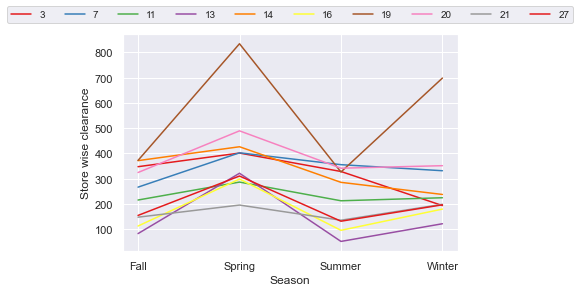

In [152]:
sns.set(style="darkgrid")
sns.lineplot(data=df, x="season", y="product clearance", hue="store", palette="Set1")

plt.xlabel("Season")
plt.ylabel("Store wise clearance")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(df['store'].unique()), fontsize='small')

In [153]:
merged_df.head()

,store,sale.date,tran.no,tran.type,cashier,size,color,class.desc,sub.class.desc,unit,unit.cost,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost,season,product clearance
0,19,2019-01-01,15553,S,2,MED,Ivory,Fashion Tops,Button Down,1,9.70,31.49,40.00,40.0,0.691966,9.70,Winter,0
1,19,2019-01-01,15555,S,2,SM,FOREST GREEN,Fashion Tops,Blouse,1,8.37,48.00,48.00,48.0,0.825625,8.37,Winter,0
2,19,2019-01-01,15557,S,2,MED,Black,Fashion Tops,Blouse,1,9.60,12.75,21.98,40.0,0.247059,9.60,Winter,1
3,19,2019-01-01,15557,S,2,MED,Ivory,Fashion Tops,Blouse,1,11.23,16.23,27.98,44.0,0.308071,11.23,Winter,1
4,19,2019-01-01,15561,S,2,Extra Small,Ivory,Fashion Tops,Blouse,1,11.23,14.95,27.98,44.0,0.248829,11.23,Winter,1
